# CBD Hemp to Isolate Pricing Predictions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Define Inputs Constants and Variables
We start by defining the constants. These are constraints that we are using to define the model. We are defining gross margins, CBD isolate potency, cost of processing isolate, and the target isolate sale price. The cost of processing isolate is calculated in a COGS analysis, available as an excel file.

| Variable Name           | Value | Description                                                   |
|-------------------------|-------|---------------------------------------------------------------|
| processor_gross_margin  | 0.38  | Processor's target gross margin                               |
| farmer_gross_margin     | 0.55  | Farmer's target gross margin                                  |
| isolate_potency         | 0.99  | The amount of CBD per kg of isolate (kg CBD/kg isolate)       |
| process_cost            | 85    | Cost in USD spent by the processor to turn 1 kg of CBD into 1 kg of isolate |
| target_isolate_price    | 200   | Target price per kg of CBD isolate (USD/kg)                   |




In [2]:
processor_gross_margin = 0.38  # Processor target gross margin
farmer_gross_margin = 0.55     # Farmer target gross margin
isolate_potency = 0.99         # kg CBD/kg isolate
process_cost = 85              # USD spent by processor to turn 1 kg of CBD into 1 kg of isolate
target_isolate_price = 200     # Target Isolate Price

Next we will define the variables in the model. These values act as the inputs for the functions below, and they span a range to allow us to get an undertanding of how variations in these values affects the final result. We will be defining the mass of hemp that is grown on an acre, the cost to farm an acre, the hemp CBD potency, and the range for price of hemp that the processor can pay. The table below shows the range of values.

| Variable Name                 | Min Range | Max Range | Description                                      |
|-------------------------------|-----------|-----------|--------------------------------------------------|
| hemp_mass_per_acre_vals       | 500       | 1800      | Poundage of hemp per acre                        |
| cost_of_farming_per_acre_vals | 500       | 1500      | Cost in USD to grow hemp per acre                |
| hemp_potency_vals             | 0.05      | 0.15      | The amount of CBD per kg of hemp (kg CBD/kg hemp)|
| hemp_price_vals               | 1         | 3         | Hemp price in USD per pound                      |


In [3]:
hemp_mass_per_acre_vals = np.linspace(500, 1800, 101)        # lbs hemp per acre
cost_of_farming_per_acre_vals = np.linspace(500, 1500, 101)  # USD per acre to grow hemp
hemp_potency_vals = np.linspace(0.05, 0.15, 101)             # kg cbd/kg hemp
hemp_price_vals = np.linspace(1, 3, 101)                     # Hemp price in USD/lb for linspace array-based calculations

## Define Functions
In this next section, we will define the mathematical functions that allow us to calculate the target values. There are four functions, and the table below details the inputs, outputs, and a description of each function:

| Function Name       | Inputs                                                                                     | Outputs                                       | Description                                                                                      |
|---------------------|--------------------------------------------------------------------------------------------|----------------------------------------------|--------------------------------------------------------------------------------------------------|
| hemp_price_per_lb   | Hemp Mass per Acre,<br>Farming cost per Acre,<br>Farmer Gross Margin                      | Minimum price per pound of hemp              | Calculates the minimum price the farmer can sell hemp for while maintaining the target margin    |
| isolate_price_per_kg | Hemp Price,<br>Hemp Potency,<br>Processor Cost,<br>Processor Gross Margin,<br>Isolate Potency             | Minimum price per kg of isolate              | Calculates the minimum price the processor can sell isolate for while maintaining the target margin |
| required_potency    | Hemp Mass per Acre,<br>Farming cost per Acre,<br>Farmer Gross Margin,<br>Processor Cost,<br>Processor Gross Margin,<br>Isolate Potency,<br>Target Isolate Price     | Required Potency                             | Calculates the potency necessary to meet the target min isolate price                           |

These first two equations are shown below:
\begin{align}
\text{Hemp Price per lb} &= \frac{(Farming Cost)}{(Mass per Acre)(1-Farmer Margin)} \\
 \\
\text{Isolate Price per kg} &= \frac{(Hemp Price per lb/Hemp Potency) \times 2.2 + Process Cost}{(1-Processor Margin) \times Isolate Potency} \\
\end{align}

By plugging the first equation into the numerator of the second equation and rearranging the variables, we can derive a relationship between the hemp potency, isolate target sale price, cost per acre, and mass per acre:
\begin{align}
\text{Required Potency} &= \frac{\frac{(Farming Cost)}{(Mass per Acre)(1-Farmer Margin)} \times 2.2}{[(1-Processor Margin) \times (Isolate Potency) \times (Target Isolate Sale Price)] - (Process Cost)} 
\end{align}

By setting the target sale price, process cost, and margins, we can determine the minimum potency at various hemp/acre and cost/acre values.

In [4]:
def hemp_price_per_lb(hemp_mass_per_acre, cost_of_farming_per_acre, farmer_gross_margin):
    return (cost_of_farming_per_acre / hemp_mass_per_acre) / (1 - farmer_gross_margin)

def isolate_price_per_kg(hemp_price, hemp_potency, process_cost, processor_gross_margin, isolate_potency):
    return (((hemp_price / hemp_potency)*2.2) + process_cost) / ((1 - processor_gross_margin) * isolate_potency)

def required_potency(hemp_price, process_cost, processor_gross_margin, isolate_potency, target_isolate_price):
    return (hemp_price * 2.2) / (((1 - processor_gross_margin) * isolate_potency * target_isolate_price)-process_cost)

## Calculate
In this next section, we will use the variables and constants with the functions that we have defined above to calculate the data points. They are stored in arrays for now, and we will call the information to generate contour plots below.

In [5]:
# Create grid arrays for each variable
hemp_mass_grid, cost_of_farming_grid = np.meshgrid(hemp_mass_per_acre_vals, cost_of_farming_per_acre_vals)
hemp_price_grid, hemp_potency_grid = np.meshgrid(hemp_price_vals, hemp_potency_vals)

# Calculate the required values for each plot
hemp_price_per_lb_grid = hemp_price_per_lb(hemp_mass_grid, cost_of_farming_grid, farmer_gross_margin)
isolate_price_per_kg_grid = isolate_price_per_kg(hemp_price_grid, hemp_potency_grid, process_cost, processor_gross_margin, isolate_potency)
required_potency_grid = required_potency(hemp_price_per_lb_grid, process_cost, processor_gross_margin, isolate_potency, target_isolate_price)

## Plot
We will now plot the data we have calculated.

#### Figure 1
The first plot of interest shows the minimum sale price as a function of hemp potency and hemp price.
This is useful for the processor as it defines their minimum price point as a function of input feedstock.

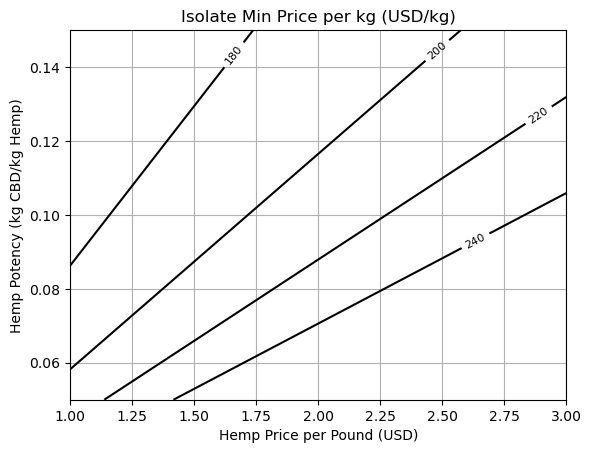

In [6]:
plt.figure()
contour_levels1 = [180,200,220,240]
cp1 = plt.contour(hemp_price_grid,hemp_potency_grid, isolate_price_per_kg_grid, levels=contour_levels1, colors='k')
plt.clabel(cp1, inline=True, fontsize=8, fmt='%1.0f')
plt.title("Isolate Min Price per kg (USD/kg)")
plt.ylabel("Hemp Potency (kg CBD/kg Hemp)")
plt.xlabel("Hemp Price per Pound (USD)")
plt.grid(True)
plt.show()

#### Figure 2
The next plot shows the miniumum price that the farmer can sell hemp for while maintaining their target margin.

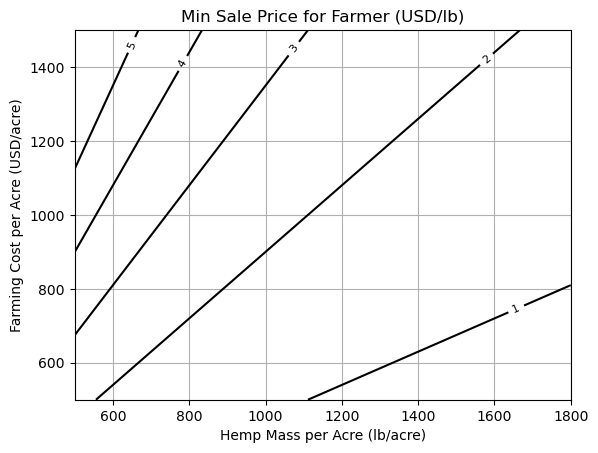

In [7]:
plt.figure()
contour_levels4 = [1, 2, 3, 4, 5]
cp4 = plt.contour(hemp_mass_grid, cost_of_farming_grid, hemp_price_per_lb_grid, levels=contour_levels4, colors='k')
plt.clabel(cp4, inline=True, fontsize=8, fmt='%1.0f')
plt.title("Min Sale Price for Farmer (USD/lb)")
plt.xlabel("Hemp Mass per Acre (lb/acre)")
plt.ylabel("Farming Cost per Acre (USD/acre)")
plt.grid(True)
plt.show()

#### Figure 3
The next plot shows the potency required to achieve the minimum $200 sale price and maintain the target margin. As described above, it uses the data from both Figure 1 and Figure 2. This figure helps get an understanding of the quality and cost of hemp required to meet the target margins and price points.

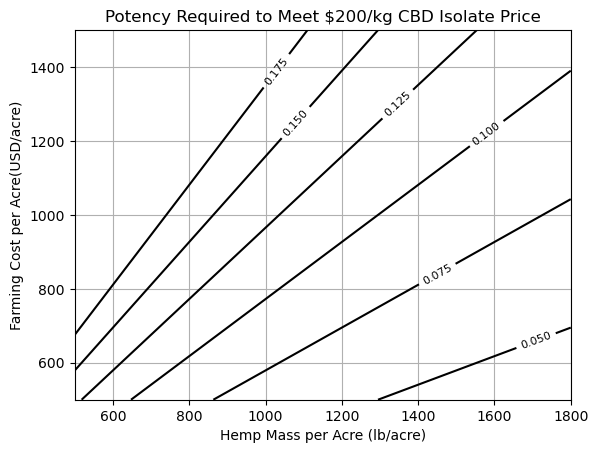

In [8]:
plt.figure()
contour_levels3 = [0.05,0.075,0.10,0.125,0.15,0.175,]
cp3 = plt.contour(hemp_mass_grid, cost_of_farming_grid, required_potency_grid, levels=contour_levels3, colors='k')
plt.clabel(cp3, inline=True, fontsize=8, fmt='%1.3f')
plt.title("Potency Required to Meet $200/kg CBD Isolate Price")
plt.xlabel("Hemp Mass per Acre (lb/acre)")
plt.ylabel("Farming Cost per Acre(USD/acre)")
plt.grid(True)
plt.show()

#### Interactive Plot
This figure is useful, but by making it interactive we have a powerful tool that allows us to see how variations in the input values would affect the output value. The code block is long, but it is effectively recalculating the values and updating the plot every time a slider bar value changes.

In [9]:
def update_plot(farmer_gross_margin, process_cost, processor_gross_margin, target_isolate_price, manual_contour,cost_per_acre_max,mass_per_acre_max):
    hemp_mass_per_acre_vals2 = np.linspace(500, mass_per_acre_max,101)        # lbs hemp per acre
    cost_of_farming_per_acre_vals2 = np.linspace(500,cost_per_acre_max, 101)  # USD per acre to grow hemp
    
    hemp_mass_grid2, cost_of_farming_grid2 = np.meshgrid(hemp_mass_per_acre_vals2, cost_of_farming_per_acre_vals2)
    
    hemp_price_per_lb_val = hemp_price_per_lb(hemp_mass_grid2, cost_of_farming_grid2, farmer_gross_margin)
    required_potency_val = required_potency(hemp_price_per_lb_val, process_cost, processor_gross_margin, isolate_potency, target_isolate_price)
    
    if manual_contour < 0.05:
        contour_levels2 = [manual_contour,0.05,0.10,0.15]
    elif manual_contour > 0.05 and manual_contour < 0.10:
        contour_levels2 = [0.05,manual_contour,0.10,0.15]
    elif manual_contour > 0.10 and manual_contour < 0.15:
        contour_levels2 = [0.05,0.10,manual_contour,0.15]
    elif manual_contour > 0.15:
        contour_levels2 = [0.05,0.10,0.15,manual_contour]
    else:
        contour_levels2 = [0.05,0.10,0.15]

    plt.figure(figsize=(8,6))
    cp2 = plt.contour(hemp_mass_grid2, cost_of_farming_grid2, required_potency_val, levels=contour_levels2, colors='k')
    plt.clabel(cp2, inline=True, fontsize=8, fmt='%1.3f')
    plt.title("Potency Required to Meet Target CBD Isolate Price")
    plt.xlabel("Hemp Mass per Acre (lb/acre)")
    plt.ylabel("Farming Cost per Acre(USD/acre)")
    plt.grid(True)
    plt.show()

widget_font = {'description_width': 'initial', 'font-size': 'small'}
slider1 = widgets.FloatSlider(min=0.0, max=0.99, step=0.01, value=0.55, description='Farmer Gross Margin:', style=widget_font)
slider2 = widgets.FloatSlider(min=70, max=110, step=1, value=85, description='Process Cost:', style=widget_font)
slider3 = widgets.FloatSlider(min=0.0, max=0.99, step=0.01, value=0.38, description='Processor Gross Margin:', style=widget_font)
slider4 = widgets.FloatSlider(min=180, max=250, step=5, value=200, description='Target Isolate Price:', style=widget_font)
slider5 = widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.06, description='Manual Potency Line:', style=widget_font)
slider6 = widgets.FloatSlider(min=1000, max=3000, step=50, value=1500, description='Cost per Acre Max:', style=widget_font)
slider7 = widgets.FloatSlider(min=1000, max=3000, step=50, value=1800, description='Mass per Acre Max:', style=widget_font)

interactive_plot_output = widgets.interactive_output(update_plot, {'farmer_gross_margin': slider1, 'process_cost': slider2, 'processor_gross_margin': slider3, 'target_isolate_price': slider4, 'manual_contour': slider5, 'cost_per_acre_max': slider6, 'mass_per_acre_max': slider7})
slider_box = widgets.VBox([slider1, slider2, slider3, slider4, slider5, slider6, slider7])
widgets.HBox([interactive_plot_output, slider_box])

The plot above can be used with the slider bars to experiement with different scenarios and get a better understanding of how the variables interact with each other.